# Non-Negative Matrix Factorization - Unsupervised

In [22]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.decomposition import NMF

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [23]:
train_split = 0.80
nrows = 250_000
path = 'c:/users/ugy1/abs/'
df=pd.read_csv(path+'datasets/processed_abs_loan_'+str(nrows)+'.csv', 
               #usecols=use_list, 
               #sep='\t',
               #compression=bz2,
               nrows=nrows,
               low_memory=False, 
              index_col=0, 
               parse_dates=True
              )
df.shape

(237024, 58)

In [24]:
column_list=df.columns.tolist()

In [25]:
df.head()

,originalloanamount,originalloanterm,originalinterestratepercentage,graceperiodnumber,obligorcreditscore,paymenttoincomepercentage,reportingperiodbeginningloanbalanceamount,nextreportingperiodpaymentamountdue,reportingperiodinterestratepercentage,nextinterestratepercentage,...,zerobalanceeffectivedate_calc,"zerobalance_[""99""]","zerobalance_[""1""]",S&P/Experian Auto Default Index,AutoIndex,BankCardIndex,FirstMortgageIndex,SecondMortgageIndex,CompositeIndex,label
0,66711.84,60,3.29,1,808.0,2.90,62677.27,0.0,3.3409,3.3409,...,0.0,1,0,0.0105,1.09,3.64,0.72,0.80,0.96,0
1,16258.45,60,0.90,0,821.0,4.36,12793.38,0.0,0.9049,0.9049,...,0.0,1,0,0.0105,1.09,3.64,0.72,0.80,0.96,0
2,31930.41,72,2.90,1,771.0,4.07,26981.85,0.0,2.9430,2.9430,...,0.0,1,0,0.0105,1.09,3.64,0.72,0.80,0.96,0
3,26065.02,65,0.90,0,890.0,5.00,4907.91,0.0,0.9037,0.9037,...,0.0,1,0,0.0093,0.99,3.86,0.68,0.59,0.92,0
4,42091.00,72,3.90,0,739.0,2.62,37060.44,0.0,3.9676,3.9676,...,0.0,1,0,0.0105,1.09,3.64,0.72,0.80,0.96,0


In [26]:
for cols in df.columns.tolist()[1:]:
    df = df.loc[df[cols] >= 0]

In [27]:
df.shape

(234912, 58)

In [28]:
# prepare label for scikit-learn
Y=df.label.values
Y.shape

(234912,)

In [29]:
# prepare input data for scikit-learn
input=df.values
input.shape

(234912, 58)

In [30]:
# calculate train/test split

len_train = int(len(input)*train_split)
print(len_train)

187929


In [31]:
# apply train/test split to labels
y_train = Y[0:len_train]
y_test = Y[len_train:]
x_train = input[0:len_train]
x_test = input[len_train:]
x_train.shape

(187929, 58)

In [32]:
export_x_test = pd.DataFrame(data=x_test)

In [33]:
export_x_test.columns=column_list
export_x_test.rename(columns={'label':'True Label'}, inplace=True)
export_x_test.head()

,originalloanamount,originalloanterm,originalinterestratepercentage,graceperiodnumber,obligorcreditscore,paymenttoincomepercentage,reportingperiodbeginningloanbalanceamount,nextreportingperiodpaymentamountdue,reportingperiodinterestratepercentage,nextinterestratepercentage,...,zerobalanceeffectivedate_calc,"zerobalance_[""99""]","zerobalance_[""1""]",S&P/Experian Auto Default Index,AutoIndex,BankCardIndex,FirstMortgageIndex,SecondMortgageIndex,CompositeIndex,True Label
0,32729.19,60.0,1.90,1.0,822.0,4.02,25358.51,0.0,1.9199,1.9199,...,0.0,1.0,0.0,0.0099,0.99,3.86,0.68,0.59,0.92,0.0
1,54876.70,36.0,0.90,1.0,817.0,20.61,39794.44,0.0,0.9057,0.9057,...,0.0,1.0,0.0,0.0110,1.11,3.28,0.66,1.08,0.89,0.0
2,42827.47,72.0,3.90,1.0,717.0,4.10,38527.47,0.0,3.9725,3.9725,...,0.0,1.0,0.0,0.0093,0.99,3.86,0.68,0.59,0.92,0.0
3,30912.69,60.0,1.90,1.0,883.0,3.60,23475.45,0.0,1.9158,1.9158,...,0.0,1.0,0.0,0.0105,1.09,3.64,0.72,0.80,0.96,0.0
4,58896.31,72.0,3.49,1.0,750.0,5.75,41471.09,0.0,3.5451,3.5451,...,0.0,1.0,0.0,0.0110,1.11,3.28,0.66,1.08,0.89,0.0


In [34]:
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import minmax_scale
# from sklearn.preprocessing import MaxAbsScaler
#from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.preprocessing import PowerTransformer

In [35]:
x_scaler=MinMaxScaler()
x_train = x_scaler.fit_transform(x_train)
x_test = x_scaler.fit_transform(x_test)

In [36]:
nmf = NMF(n_components=x_test.shape[1], random_state=1, alpha=0.1, l1_ratio = 0.5).fit(x_test)

In [37]:
x_pred = x_test

In [38]:
prediction_nmf = nmf.fit_transform(x_pred)

In [39]:
mse = np.mean(np.power(x_test - prediction_nmf, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test})
error_df.describe()

,Reconstruction_error,True_class
count,46983.000000,46983.000000
mean,0.209399,0.026754
std,0.028453,0.161366
min,0.115265,0.000000
25%,0.188394,0.000000
50%,0.208616,0.000000
75%,0.229248,0.000000
max,0.314906,1.000000


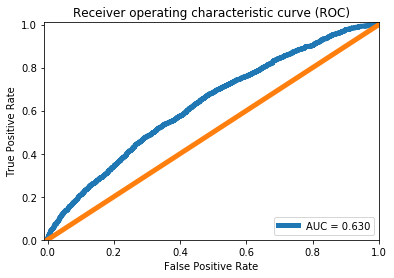

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df.True_class, error_df.Reconstruction_error)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

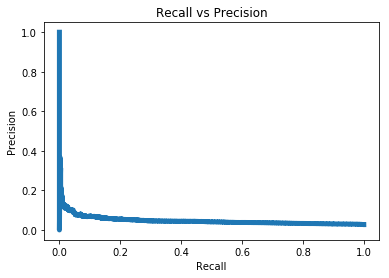

In [43]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(recall_rt, precision_rt, linewidth=5, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

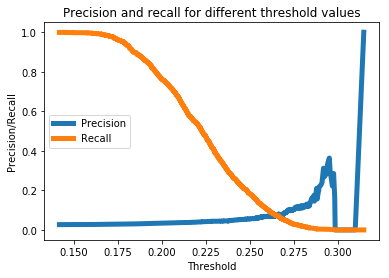

In [44]:
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

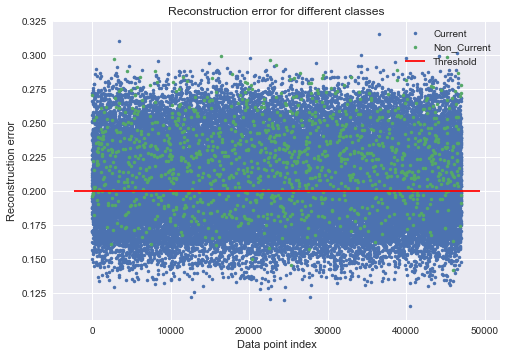

In [55]:
threshold_fixed = 0.2
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Non_Current" if name == 1 else "Current")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

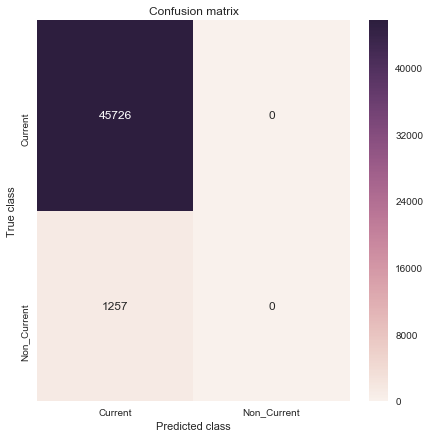

In [48]:
import seaborn as sns
LABELS=['Current', 'Non_Current']
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)

plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()